# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: Fatemeh Tohidian
2.   Student Number: 97100354


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
# from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [2]:
# Change the address as you wish
plays = pd.read_csv('./data/user_artists.dat', sep='\t')
artists = pd.read_csv('./data/artists.dat', sep='\t', usecols=['id','name'])

In [3]:
plays

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983
...,...,...,...
92829,2100,18726,337
92830,2100,18727,297
92831,2100,18728,281
92832,2100,18729,280


# Preprocessing (20 pts)

In [4]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################
ap = pd.merge(plays, artists, how="left", left_on='artistID', right_on='id').sort_values(by=['id', 'userID'])
ap = ap[['id', 'name', 'userID', 'artistID', 'weight']]


In [6]:
ap

,id,name,userID,artistID,weight
1550,1,MALICE MIZER,34,1,212
12611,1,MALICE MIZER,274,1,483
35861,1,MALICE MIZER,785,1,76
6415,2,Diary of Dreams,135,2,1021
11847,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
20914,18741,Diamanda Galás,454,18741,301
20915,18742,Aya RL,454,18742,294
20916,18743,Coptic Rain,454,18743,287
20917,18744,Oz Alchemist,454,18744,286


In [ ]:
ap

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [5]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})

In [6]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################
ap.drop('id', axis=1, inplace=True)
ap.reset_index(drop=True)
#TODO

,name,userID,artistID,playCount
0,MALICE MIZER,34,1,212
1,MALICE MIZER,274,1,483
2,MALICE MIZER,785,1,76
3,Diary of Dreams,135,2,1021
4,Diary of Dreams,257,2,152
...,...,...,...,...
92829,Diamanda Galás,454,18741,301
92830,Aya RL,454,18742,294
92831,Coptic Rain,454,18743,287
92832,Oz Alchemist,454,18744,286


In [7]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################


artist_rank = ap[['name', 'userID', 'playCount']]
artist_rank = artist_rank.groupby('name').agg({'userID': 'nunique', 'playCount': 'sum'}).rename(columns={'userID':'totalUniqueUsers','playCount' : 'totalArtistPlays'})
artist_rank.sort_values(by= 'totalArtistPlays', ascending = False, inplace= True)
artist_rank['avgUserPlays'] = artist_rank['totalArtistPlays']/ artist_rank['totalUniqueUsers']

In [ ]:
artist_rank

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
Morris,1,1,1.000000
Eddie Kendricks,1,1,1.000000
Excess Pressure,1,1,1.000000


In [ ]:
artist_rank

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
Morris,1,1,1.000000
Eddie Kendricks,1,1,1.000000
Excess Pressure,1,1,1.000000


In [8]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################



ap = pd.merge(ap, artist_rank, how="left", on='name')
# .sort_values(by=['id', 'userID'])

In [11]:
ap.head(20)

,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
0,MALICE MIZER,34,1,212,3,771,257.000000
1,MALICE MIZER,274,1,483,3,771,257.000000
2,MALICE MIZER,785,1,76,3,771,257.000000
3,Diary of Dreams,135,2,1021,12,8012,667.666667
4,Diary of Dreams,257,2,152,12,8012,667.666667
5,Diary of Dreams,325,2,3466,12,8012,667.666667
6,Diary of Dreams,397,2,56,12,8012,667.666667
7,Diary of Dreams,560,2,134,12,8012,667.666667
8,Diary of Dreams,580,2,803,12,8012,667.666667
9,Diary of Dreams,935,2,428,12,8012,667.666667


In [ ]:
ap.head(20)

,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
0,MALICE MIZER,34,1,212,3,771,257.000000
1,MALICE MIZER,274,1,483,3,771,257.000000
2,MALICE MIZER,785,1,76,3,771,257.000000
3,Diary of Dreams,135,2,1021,12,8012,667.666667
4,Diary of Dreams,257,2,152,12,8012,667.666667
5,Diary of Dreams,325,2,3466,12,8012,667.666667
6,Diary of Dreams,397,2,56,12,8012,667.666667
7,Diary of Dreams,560,2,134,12,8012,667.666667
8,Diary of Dreams,580,2,803,12,8012,667.666667
9,Diary of Dreams,935,2,428,12,8012,667.666667


# Exploration

In [9]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x[:20], y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

/home/fatemeh/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


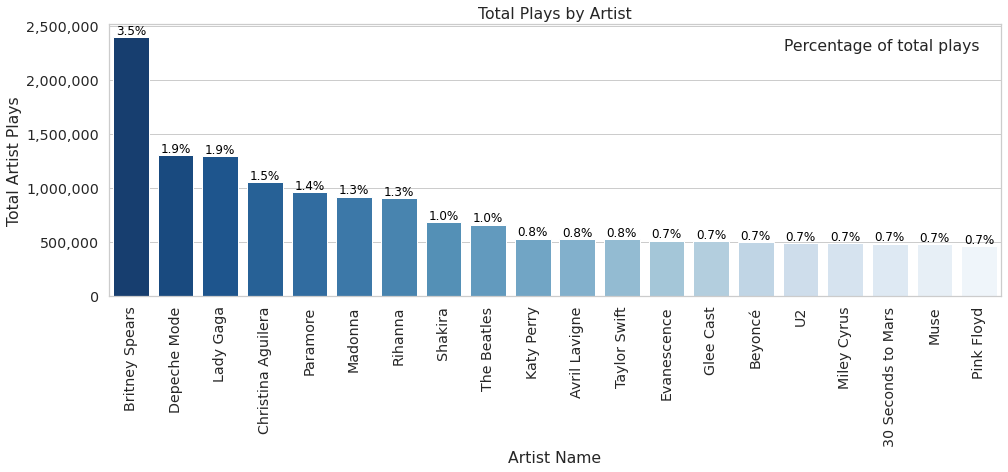

In [10]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

/home/fatemeh/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


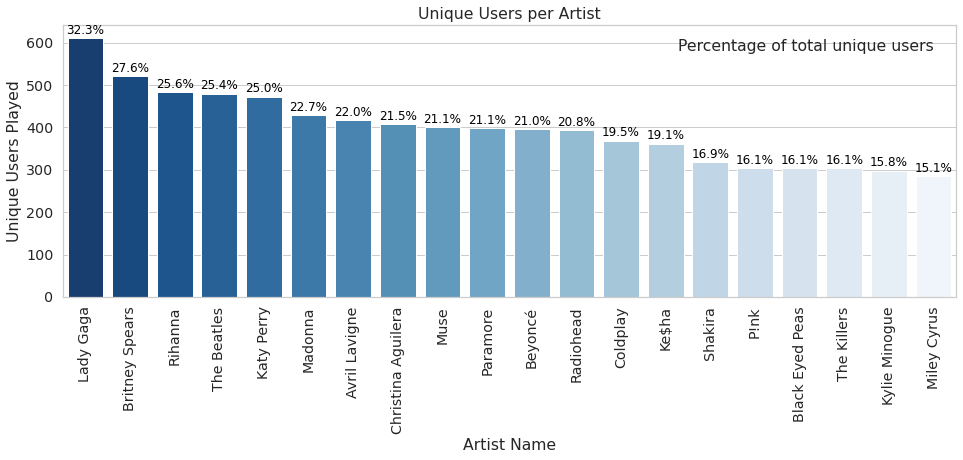

In [11]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

/home/fatemeh/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


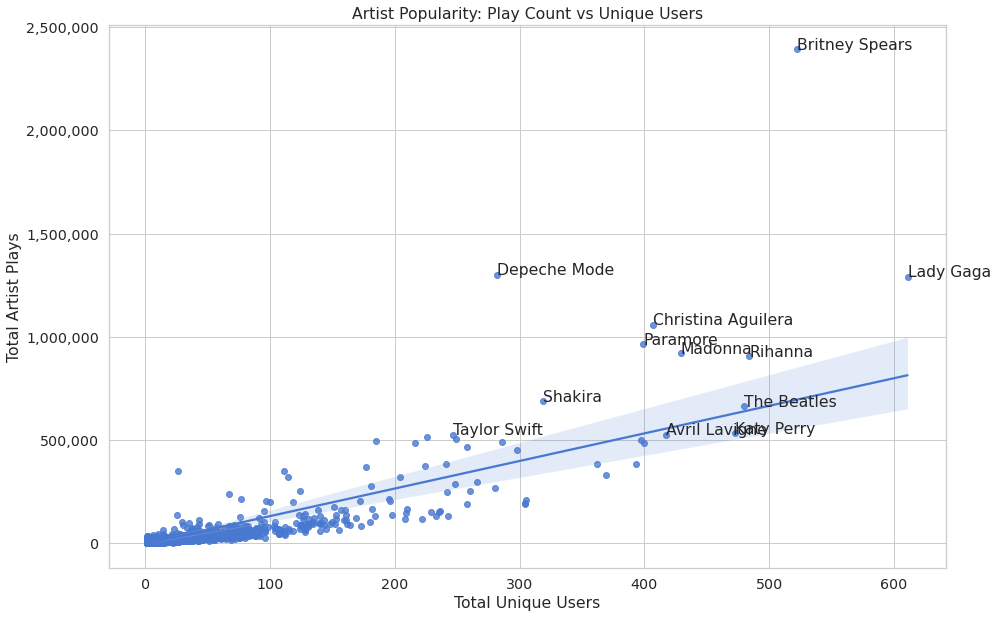

In [12]:
top_artists = artist_rank.nlargest(12, 'totalArtistPlays').index
# TODO : index of top 12 items in "artist_rank" based on their "totalArtistPlays"

x = artist_rank.totalUniqueUsers
# TODO : "totalUniqueUsers" of "artist_rank"
y =  artist_rank.totalArtistPlays
# TODO :  "totalArtistPlays" of "artist_rank"
labels = artist_rank.index
# TODO : index of "artist_rank"

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x,y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

# Preprocessing (30 pts)

In [13]:
pc = ap.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)

In [ ]:
ap.head()

,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays,playCountScaled
0,MALICE MIZER,34,1,212,3,771,257.000000,0.000598
1,MALICE MIZER,274,1,483,3,771,257.000000,0.001367
2,MALICE MIZER,785,1,76,3,771,257.000000,0.000213
3,Diary of Dreams,135,2,1021,12,8012,667.666667,0.002892
4,Diary of Dreams,257,2,152,12,8012,667.666667,0.000428


In [14]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################

func = lambda x: x
ratings_df = ap.pivot_table(index='userID', columns='artistID', values='playCountScaled', aggfunc= func)

In [15]:
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################
ratings =  ratings_df.fillna(0).to_numpy()

In [17]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

## Your Code

observed_values_count  =  np.count_nonzero(ratings)
sparseness = observed_values_count / ratings.size
## END

# Fitting(Training) Model (50pts)

In [ ]:
ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00115397, ..., 0.        , 0.        ,
        0.        ]])

In [18]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################


def train_test_split(ratings):
    train = ratings
    validation = np.zeros_like(ratings)
    for i in range(0,ratings.shape[0]):
      observed_ratings_indices = np.nonzero(ratings[i])[0]
      if len(observed_ratings_indices) >= MIN_USER_RATINGS :
        delete_indices = np.random.choice(observed_ratings_indices, DELETE_RATING_COUNT, replace=False)
        validation[i][delete_indices] = train[i][delete_indices]
        train[i][delete_indices] = 0
    return train, validation

In [19]:
train, val = train_test_split(ratings)

In [20]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################


def rmse(prediction, ground_truth):
    observed_values = np.nonzero(ground_truth)
    prediction = prediction[observed_values]
    ground_truth = ground_truth[observed_values]
    return sqrt(mean_squared_error(prediction, ground_truth))

In [21]:
class Recommender:
  
  def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
  
  def predictions(self, P, Q):
    #TODO : create the prediction matrix
    return None
  
  def fit(self, X_train, X_val):
    train_loss_list = [0]*self.n_epochs
    validation_loss_list = [0]*self.n_epochs
    user_count = X_train.shape[0]
    item_count = X_train.shape[1]
    P = np.random.normal(0, 1, (user_count, self.n_latent_features))
    Q = np.random.normal(0, 1, (item_count, self.n_latent_features))
    for epoch in range(0, self.n_epochs):
      print('-'*10, epoch, '-'*10)
      train_loss = 0 
      n_train = 0
      for u,user in enumerate(X_train):
        nonzero_ratings = np.nonzero(user)[0]
        for i in nonzero_ratings : 
          # print(i)
          rating = X_train[u][i]
          n_train+=1
          e  = rating - np.dot(Q[i], P[u])
          train_loss+=abs(e)
          Q[i] = Q[i] + self.learning_rate * ((e * P[u])-(self.lmbda * Q[i]))
          P[u] = P[u] + self.learning_rate * ((e * Q[i])-(self.lmbda * P[u]))
      train_loss_list[epoch] = train_loss/ n_train
      predictions = P @ np.transpose(Q)
      validation_loss_list[epoch] = rmse(predictions, X_val)
      print('train loss ', train_loss_list[epoch])
      print('validation loss', validation_loss_list[epoch])
    return self, train_loss_list, validation_loss_list

  def predict(self, X_train, user_index):
    pass
    #TODO : return predicted ratings for unobserved values of specific user index

In [22]:
#creating recommender object
recommender, train_loss_list, validation_loss_list= Recommender().fit(train, val)

---------- 0 ----------
train loss  1.2198993511919447
validation loss 1.5817344354372667
---------- 1 ----------
train loss  1.109775398986359
validation loss 1.4709738608401581
---------- 2 ----------
train loss  1.0213589186169072
validation loss 1.3826118812196924
---------- 3 ----------
train loss  0.9481853576505176
validation loss 1.309293668418191
---------- 4 ----------
train loss  0.8862079062029541
validation loss 1.246702989461246
---------- 5 ----------
train loss  0.8327704511709105
validation loss 1.1921275176092545
---------- 6 ----------
train loss  0.7860225192209485
validation loss 1.1437653301614366
---------- 7 ----------
train loss  0.7446312779153191
validation loss 1.100363349058035
---------- 8 ----------
train loss  0.7076229535390727
validation loss 1.0610165667649487
---------- 9 ----------
train loss  0.6742547951731337
validation loss 1.0250504039020178
---------- 10 ----------
train loss  0.6439517785497297
validation loss 0.9919485156123595
---------- 11

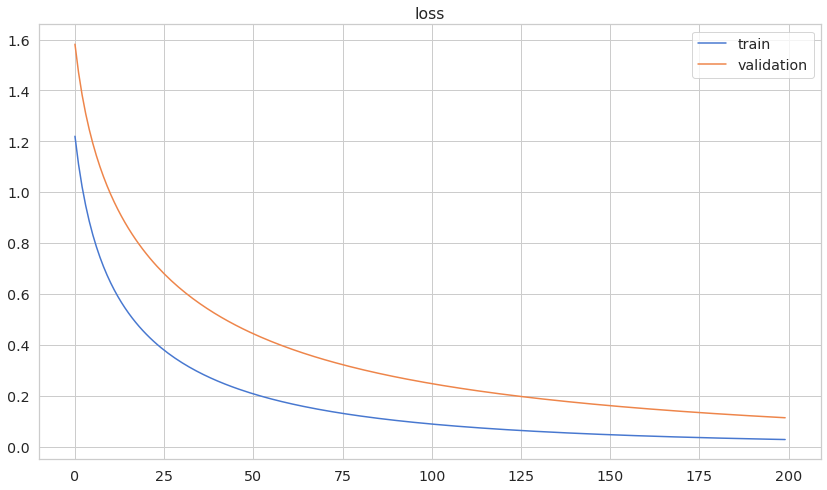

In [23]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################
x_axis= list(range(0, 200))

plt.plot(x_axis, train_loss_list, label = 'train')
plt.plot(x_axis, validation_loss_list, label = 'validation')
plt.title('loss')
plt.legend()
plt.show()
#TODO

# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

# Making recommendations

In [ ]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)

In [ ]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
  artist_ids = ratings_df.columns[artists_index]
  artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
  top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
  
  artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
  artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
  return artist_recommendations.sort_values("rating", ascending=False)

In [ ]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]

create_artist_ratings(artists, existing_ratings_index, existing_ratings)

In [ ]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions)

# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**